In [1]:
# try:
#     import torch
#     import torchvision
#     assert int(torch.__version__.split(".")[0] == 2 or int(torch.__version__.split(".")[1]) >= 12 ,  "Your torch's version is out up date."
#     assert int(torchvision.__version__.split(".")[1]) >= 13, "Your torchvision's version is out up date."
#     print(f"torch version: {torch.__version__}")
#     print(f"torchvision version: {torchvision.__version__}")
# except:
#     print("Start downloading the later version.")
# #     !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
# #     import torch
# #     import torchvision
# #     print(f"torch version: {torch.__version__}")
# #     print(f"torchvision version: {torchvision.__version__}")

In [2]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

^C


In [36]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [6]:
import os 

import requests as req 
from pathlib import Path
import zipfile

folder_name = "pizza_steak_sushi"
data_dir = Path("../data")
image_dir = data_dir / folder_name

if image_dir.is_dir():
    print(f"{folder_name} has existed. Not need to download.")
    
else:
    print(f"{folder_name} is not found. Downloading...")
    resouces_link = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
    
    image_dir.mkdir(parents=True, exist_ok=True)
    zip_file_name = folder_name + ".zip"
    zip_file_dir = image_dir / zip_file_name
    
    with open(zip_file_dir, "wb") as f:
        print(f"Downloading {zip_file_name}...")
        req  = requests.get(resouces_link)
        f.write(req.content)
        
    with zipfile.ZipFile(zip_file_dir,  "r") as zip_ref:
        print(f"Unzipping zip file {zip_file_name}")
        zip_ref.extractall(image_dir)
        
    os.remove(zip_file_dir)



pizza_steak_sushi has existed. Not need to download.


In [7]:
try:
    os.remove(image_dir / (folder_name + ".zip"))
except:
    print("File doesn't exist")

File doesn't exist


In [9]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary
    
    
try:
    from going_modular.going_modular import data_setup, engine
except:
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !MOVE pytorch-deep-learning/going_modular .
    !rmdir pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.


Cloning into 'pytorch-deep-learning'...
error: 6629 bytes of body are still expected
fetch-pack: unexpected disconnect while reading sideband packet
fatal: early EOF
fatal: fetch-pack: invalid index-pack output
The system cannot find the path specified.
The system cannot find the file specified.


ModuleNotFoundError: No module named 'going_modular'

In [18]:
train_dir = image_dir / "train"
test_dir = image_dir / "test"

In [10]:
import data_setup, engine

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ADMIN\\anaconda3\\envs\\DSCoursera\\Lib\\site-packages\\~~rch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.



Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     - -------------------------------------- 0.2/4.0 MB 3.1 MB/s eta 0:00:02
     ----- ---------------------------------- 0.6/4.0 MB 5.9 MB/s eta 0:00:01
     -------- ------------------------------- 0.9/4.0 MB 7.0 MB/s eta 0:00:01
     ------------ --------------------------- 1.3/4.0 MB 6.7 MB/s eta 0:00:01
     ---------------- ----------------------- 1.7/4.0 MB 7.1 MB/s eta 0:00:01
     --------------------- ------------------ 2.1/4.0 MB 7.4 MB/s eta 0:00:01
     ------------------------ --------------- 2.4/4.0 MB 7.7 MB/s eta 0:00:01
     --------------------------- ------------ 2.7/4.0 MB 7.3 MB/s eta 0:00:01
     ------------------------------- -------- 3.1/4.0 MB 7.5 MB/s eta 0:00:01
     ---------------------------------- ----- 3.4/4.0 MB 7.6 MB/s eta 0:00:01
     -------------------------------------- - 3.8/4.0 MB 7.5 MB/s eta 0:00:01
     -------

In [13]:
manual_transforms = transforms.Compose([
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                  std=[0.229, 0.224, 0.225])])

In [16]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [21]:
auto_transforms = weights.transforms()

# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1d487ddb3a0>,
 ['pizza', 'steak', 'sushi'])

In [22]:
model = torchvision.models.efficientnet_b0(weights=weights)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\ADMIN/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|███████████████████████████████████████████████████████████████████████████████████| 20.5M/20.5M [00:08<00:00, 2.41MB/s]


In [33]:
for para in model.features.parameters():
    para.requires_grad = False

In [35]:
model.classifier 

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [40]:
torch.manual_seed(82)
torch.cuda.manual_seed(82)

output_shape = len(class_names)

model.classifier = nn.Sequential(
    nn.Dropout(p=0.2,  inplace=True),
    nn.Linear(in_features=1280, out_features=output_shape, bias=True))

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [48]:
from timeit import default_timer as timer

start_time = timer()

train_result = engine.train(model=model,
                            train_dataloader=train_dataloader,
                            test_dataloader=test_dataloader,
                            loss_fn=loss_fn,
                            optimizer=optimizer,
                            epochs=8, 
                            device=device)

end_time = timer()

print(f"[INFO] Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9378 | train_acc: 0.5820 | test_loss: 0.8082 | test_acc: 0.6411
Epoch: 2 | train_loss: 0.7814 | train_acc: 0.7266 | test_loss: 0.6880 | test_acc: 0.8968
Epoch: 3 | train_loss: 0.6643 | train_acc: 0.7734 | test_loss: 0.5903 | test_acc: 0.9062
Epoch: 4 | train_loss: 0.6279 | train_acc: 0.8008 | test_loss: 0.5686 | test_acc: 0.8759
Epoch: 5 | train_loss: 0.5886 | train_acc: 0.8047 | test_loss: 0.5854 | test_acc: 0.8665
Epoch: 6 | train_loss: 0.5231 | train_acc: 0.8047 | test_loss: 0.5003 | test_acc: 0.8665
Epoch: 7 | train_loss: 0.4743 | train_acc: 0.8984 | test_loss: 0.4709 | test_acc: 0.8655
Epoch: 8 | train_loss: 0.5801 | train_acc: 0.7773 | test_loss: 0.4715 | test_acc: 0.8352
[INFO] Total training time: 231.363 seconds


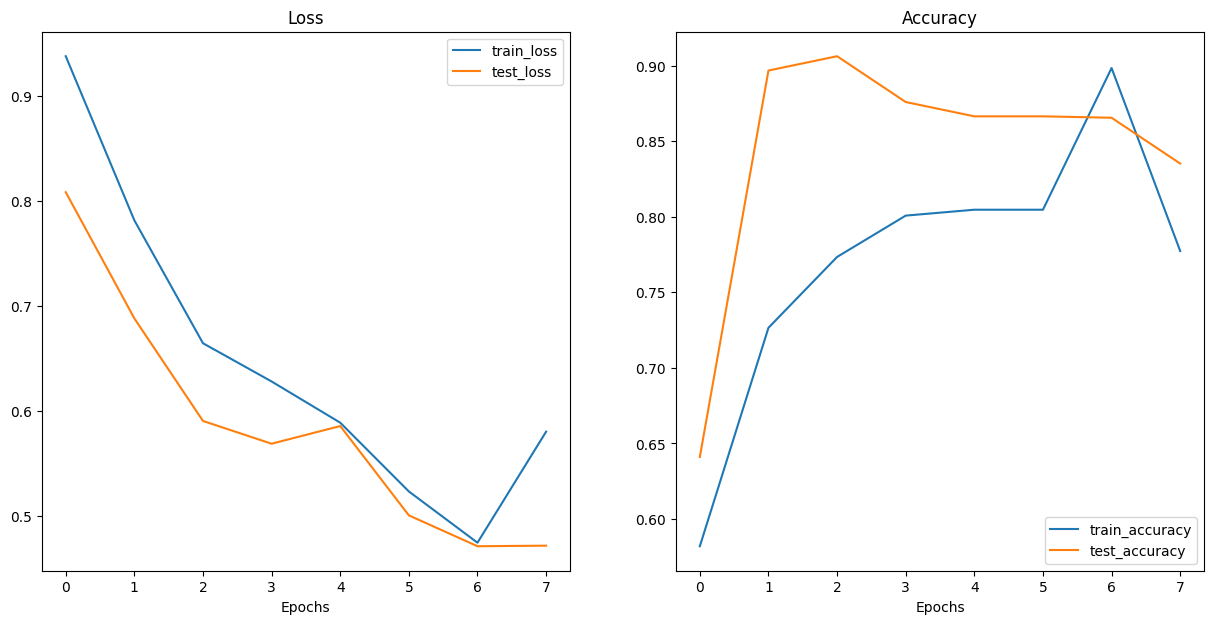

In [53]:
from helper_functions import plot_loss_curves

plot_loss_curves(train_result)

In [66]:
from typing import Tuple, List
from PIL import Image

import matplotlib.pyplot as plt

def pred_and_plot_image(model: nn.Module, 
                                            image_path : str,
                                            image_size: Tuple[int, int],
                                            class_names: List[str], 
                                            device: torch.device,
                                            transforms: torchvision.transforms = None, ) :
    
    image = Image.open(image_path)
    
    if transforms is None:
        image_transforms = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    else:
        image_transforms = transforms
    
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        transformed_image = image_transforms(image).unsqueeze(dim=0)        
        pred_image_logit = model(transformed_image.to(device))
        
    pred_image_softmax = pred_image_logit.softmax(dim = 1)

    pred_image = pred_image_softmax.argmax(dim = 1)

    plt.figure()
    plt.title(f"Prediction: {class_names[pred_image]} | Probability: {pred_image_softmax.max():.3f} ")
    plt.imshow(image)
    plt.axis(False)

In [67]:
list(Path(test_dir).glob("*/*.jpg"))

[WindowsPath('../data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('../data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath

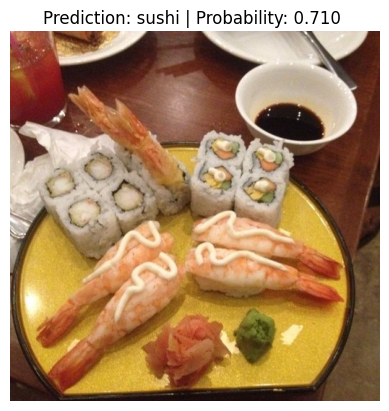

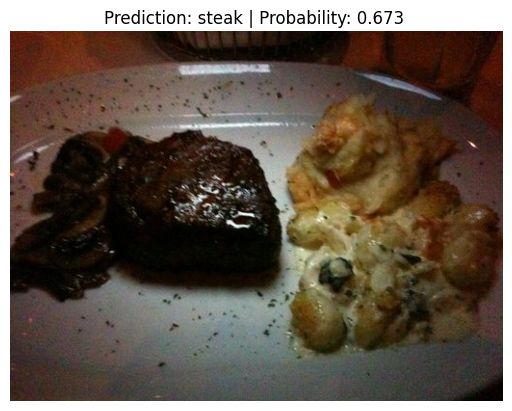

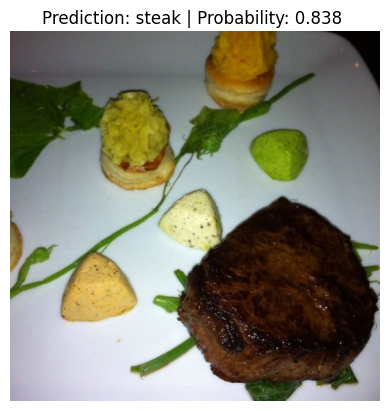

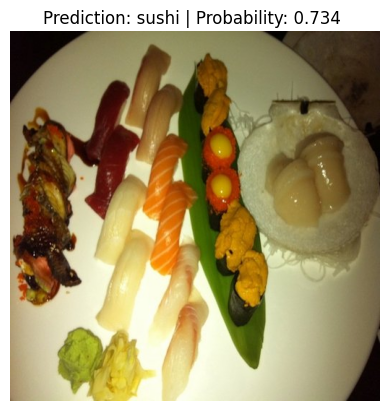

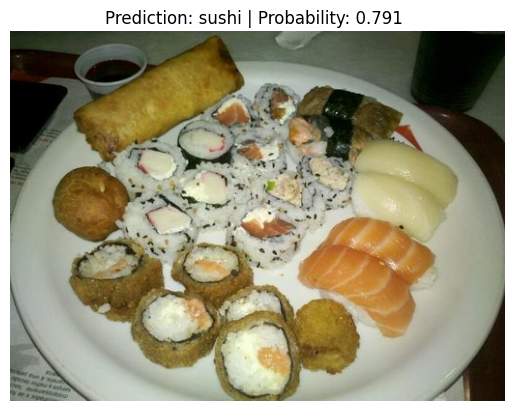

In [68]:
import random

list_all_test_image = list(Path(test_dir).glob("*/*.jpg"))
random_test_image = random.sample(list_all_test_image, k = 5)


image_size = (244, 244)

for test_image in random_test_image:
    pred_and_plot_image(model=model,
                                         image_path=test_image,
                                         class_names=class_names,
                                         device=device,
                                         transforms=auto_transforms,
                                         image_size=image_size)


In [50]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=40,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape                              Output Shape                             Param #                                  Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]                        [32, 3]                                  --                                       Partial
├─Sequential (features)                                      [32, 3, 224, 224]                        [32, 1280, 7, 7]                         --                                       False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]                        [32, 32, 112, 112]                       --                                       False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]                        [32, 32, 112, 112]                       (864)                                    False
│    │    └─BatchNorm2d (1)                 